In [ ]:
from html_scraper import main
# main()

In [ ]:
import pandas as pd
import matplotlib.patches as mpatches
import numpy

In [1]:
moč = pd.read_csv("podatki/tier_list.csv")
strategije = pd.read_csv("podatki/top_decks.csv")
vse_karte = pd.read_csv("podatki/total_cards.csv")

NameError: name 'pd' is not defined

# Yu-Gi-Oh!

Yu-Gi-Oh! je popularna igra s kartami. Igra se igra z zbiri velikosti med 40 in 60 kart, pri čemer je vse skupaj navoljo nekaj preko 10.000 različnih kart. Vsak igralec svoj zbir (kupček, s tujko deck) načrtuje na osnovi raznih strategij in posameznih močnih kart, s katerimi poskuša zmagati posamezno igro. V tem projektu bom snel podatk s spletne strani [Master Duel Meta](https://www.masterduelmeta.com/), ki ima zbrane podatke o uspešnosti raznih strategij. Hrani tudi sezname zbirov, ki jih na njej objavljajo uporabniki.

Prvo si poglejmo, katere so trenutno najmočnejše strategije.

### Najboljše strategije

Moč strategij je v viru ocenjena na podlagi njene uspešnosti na raznih spletnih turnirjih. To pomeni, da lestvica ne predstavlja le učinkovitosti strategije, ampak delno tudi njeno popularnost. Znano dejstvo je na primer, da je *Snake-Eye Fire King* bolša strategija kot *Yubel*, kar ob času pisanja lestvica ne prikazuje.

In [ ]:
# Polepšanje tabele 1
moč["stopnja"] = moč["stopnja"].apply(int)
if type(moč["moč"][0]) == numpy.float64:
    moč["moč"] = moč["moč"].apply("{:.1f}".format)
moč.style.hide()

ime strategije,moč,stopnja
Yubel,23.5,1
Snake-Eye Fire King,17.0,1
Branded,7.5,2
Snake-Eye,6.0,3
Tearlaments,6.0,3
Voiceless Voice,4.0,3
Rescue-ACE,3.0,3


In [ ]:
print(f'Tabela kaže, da sta trenutno dve najboljši strategiji \x1B[3m{moč["ime strategije"][0]}\x1B[0m in \x1B[3m{moč["ime strategije"][1]}\x1B[0m.')

Tabela kaže, da sta trenutno dve najboljši strategiji Yubel in Snake-Eye Fire King.


### Priljubljenost strategij

Na spletni strani se nahaja ~300 aktualnih zbirov, ki so jih naložili uporabnikii v zadnjih dveh tednih. Iz števila objavljenih zbirov lahko sklepamo na priljibljenost strategij. Običajno so popularne strategija tudi najboljše. 

In [ ]:
strategije.head(15)

,ime strategije,število zbirov
0,Yubel,51
1,Voiceless Voice,47
2,Snake-Eye Fire King,27
3,Tearlaments,20
4,Branded,18
5,Ice Barrier,18
6,Stun,15
7,Raidraptor,12
8,Centur-Ion,11
9,Labrynth,9


Če primerjamo zgornji dve tabeli ugotovimo, da so najboljše strategije tudi tiste, ki imajo objavljenih največ zbirov, se pravi so priljubljene. Pri tem izstopa nova strategija *Voiceless Voice*, ki ni med najuspešnejšimi.

<Axes: >

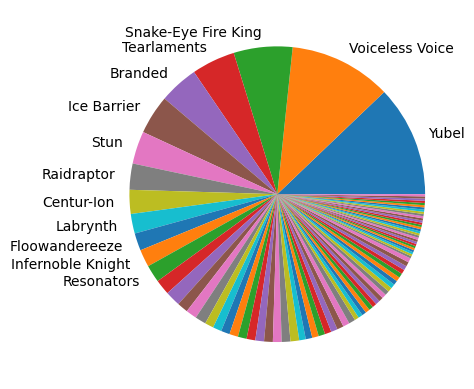

In [ ]:
strategije2 = strategije
labele = []
for i in range(len(strategije2["število zbirov"])):
    if strategije2["število zbirov"].iloc[i] > 7:
        labele.append(strategije2["ime strategije"].iloc[i])
    else:
        labele.append(None)
strategije2["število zbirov"].plot.pie(ylabel="", labels=labele)

### Frekveca pojavitve posameznih kart

In [ ]:
x = 0
for num in strategije["število zbirov"]:
    x += num
print(f'V zadnjih dveh tednih je bilo naloženih {x} zbirov za {len(strategije)} različnih strategij.')

V zadnjih dveh tednih je bilo naloženih 420 zbirov za 87 različnih strategij.


Med vsemi temi zbiri imamo pribljižno 20.000 kart, od tega okoli 1500 različnih. Posamezna karta je v nekem zbiru lahko v največ treh kopijah. Za posamezno karto preverimo, kalikokrat se je pojavila v vseh zbirih ter v koliko različnih zbirih se nahaja. Igra Yu-Gi-Oh! posamezen zbir kart dodatno deli še na glavni zbir (main deck) in dodatni zbir (extra deck). To predstavlja dve medsebojno ekskluzivni lokaciji, kjer se posamezna karta lahko nahaja.

In [ ]:
vse_karte.sort_values(by="število pojavitev", ascending=False).head(15).style.hide(axis="index")

karta,število pojavitev,število zbirov,lokacija
Infinite Impermanence,934,341,main
"Maxx ""C""",884,297,main
Ash Blossom & Joyous Spring,817,279,main
Called by the Grave,628,315,main
Evenly Matched,437,168,main
Droll & Lock Bird,307,122,main
Triple Tactics Talent,293,184,main
S:P Little Knight,287,268,extra
Effect Veiler,258,118,main
Crossout Designator,209,209,main


w

In [ ]:
'''Prikaže tabelo kart s 3 stolpci 
1 - št. pojavitev/št. strategij 
2 - št. pojavitev/zbiri, kjer se pojavi vsaj enkrat
3 - št. zbirov kjer se pojavi/št. strategij'''

st_zbirov = 0
for num in strategije["število zbirov"]:
    st_zbirov += num

st_1 = "povprečna absolutna množina"
st_2 = "povprečna relativna množina"
st_3 = "povprečna prisotnost [%]"

vse_karte_proc = vse_karte.copy()
vse_karte_proc = vse_karte_proc.rename(columns={"število pojavitev": st_1, "število zbirov": st_2, "lokacija": st_3})

vse_karte_proc[st_1] = vse_karte["število pojavitev"] / st_zbirov
vse_karte_proc[st_1] = vse_karte_proc[st_1].apply("{:.3f}".format)

vse_karte_proc[st_2] = vse_karte["število pojavitev"] / vse_karte["število zbirov"]
vse_karte_proc[st_2] = vse_karte_proc[st_2].apply("{:.3f}".format)

vse_karte_proc[st_3] = 100 * vse_karte["število zbirov"] / st_zbirov


In [ ]:
vse_karte_proc.sort_values(by=st_1, ascending=False).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%]
Infinite Impermanence,2.224,2.739,81.190476
"Maxx ""C""",2.105,2.976,70.714286
Ash Blossom & Joyous Spring,1.945,2.928,66.428571
Called by the Grave,1.495,1.994,75.000000
Evenly Matched,1.040,2.601,40.000000
Droll & Lock Bird,0.731,2.516,29.047619
Triple Tactics Talent,0.698,1.592,43.809524
S:P Little Knight,0.683,1.071,63.809524
Effect Veiler,0.614,2.186,28.095238
Crossout Designator,0.498,1.000,49.761905


In [ ]:
vse_karte_proc.sort_values(by=st_3, ascending=False).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%]
Infinite Impermanence,2.224,2.739,81.190476
Called by the Grave,1.495,1.994,75.000000
"Maxx ""C""",2.105,2.976,70.714286
Ash Blossom & Joyous Spring,1.945,2.928,66.428571
S:P Little Knight,0.683,1.071,63.809524
Crossout Designator,0.498,1.000,49.761905
Triple Tactics Talent,0.698,1.592,43.809524
Pot of Prosperity,0.417,1.000,41.666667
Evenly Matched,1.040,2.601,40.000000
Super Starslayer TY-PHON - Sky Crisis,0.343,1.083,31.666667


In [ ]:
vse_karte_proc.sort_values([st_2, st_1], ascending=[True, False]).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prisotnost [%]
Crossout Designator,0.498,1.000,49.761905
Pot of Prosperity,0.417,1.000,41.666667
Harpie's Feather Duster,0.262,1.000,26.190476
Baronne de Fleur,0.260,1.000,25.952381
Pot of Extravagance,0.257,1.000,25.714286
Accesscode Talker,0.221,1.000,22.142857
"Apollousa, Bow of the Goddess",0.214,1.000,21.428571
PSY-Frame Driver,0.210,1.000,20.952381
Bystial Magnamhut,0.195,1.000,19.523810
Foolish Burial,0.193,1.000,19.285714


<Axes: >

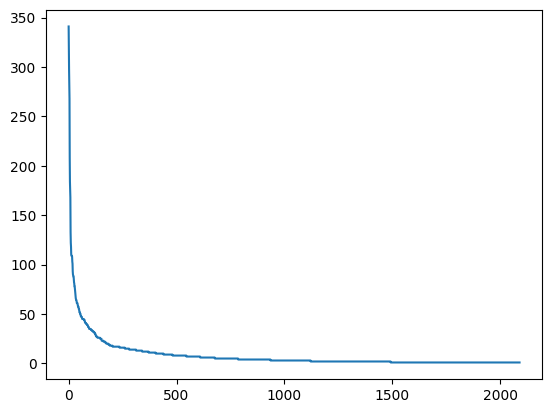

In [ ]:
vse_karte2 = vse_karte.sort_values(by="število zbirov", ascending=False).copy()
vse_karte2 = vse_karte2.reset_index()
vse_karte2["število zbirov"].plot()

<Axes: >

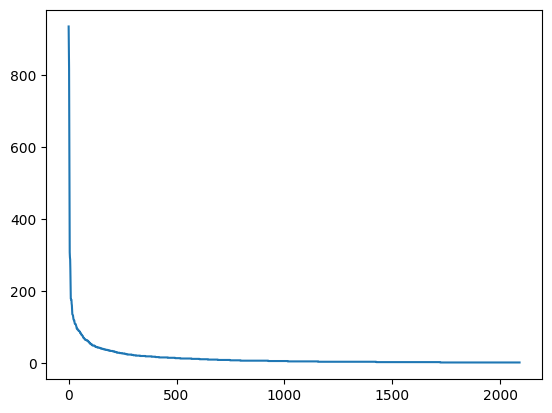

In [ ]:
vse_karte3 = vse_karte.sort_values(by="število pojavitev", ascending=False).copy()
vse_karte3 = vse_karte3.reset_index()
vse_karte3["število pojavitev"].plot()

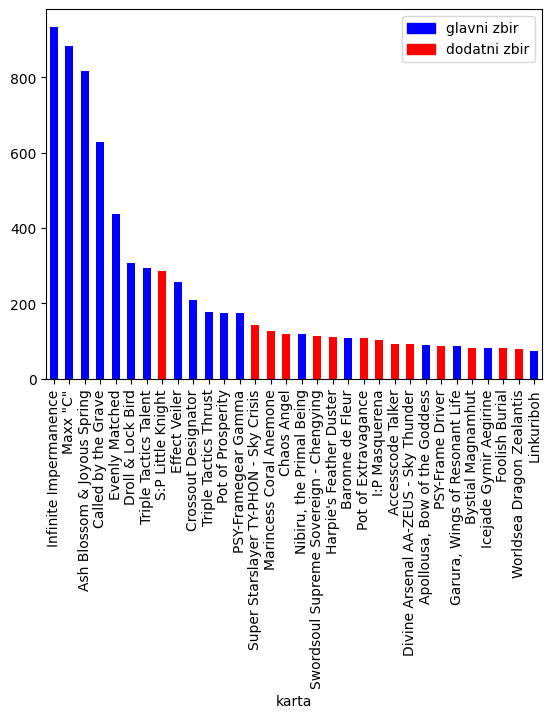

In [ ]:
vse_karte3 = vse_karte[vse_karte["število zbirov"] > 70].sort_values(by="število pojavitev", ascending=False).copy()
vse_karte3 = vse_karte3.set_index(vse_karte3["karta"])

colors = []
for kje in vse_karte3["lokacija"]:
    if kje == "main":
        colors.append("blue")
    elif kje == "extra":
        colors.append("red")
        
red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The red data')

vse_karte3["število pojavitev"].plot.bar(rot=90,color=colors).legend([blue_patch, red_patch],["glavni zbir", "dodatni zbir"])

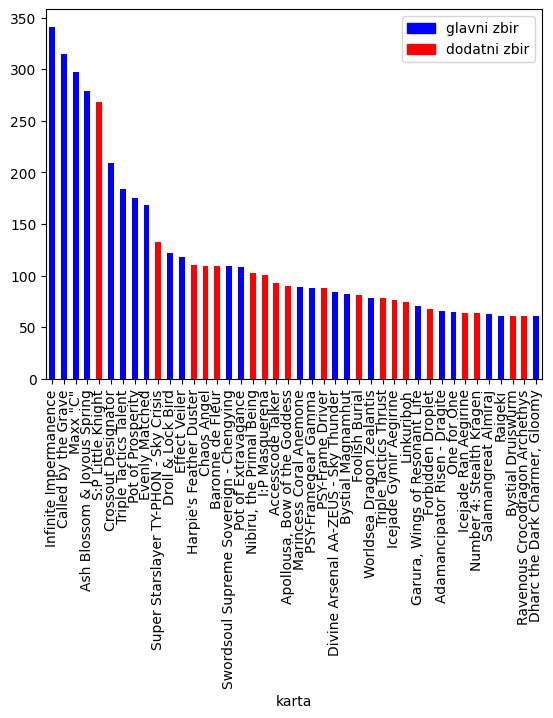

In [ ]:
vse_karte4 = vse_karte[vse_karte["število zbirov"] > 60].sort_values(by="število zbirov", ascending=False).copy()
vse_karte4 = vse_karte4.set_index(vse_karte4["karta"])

colors = []
for kje in vse_karte4["lokacija"]:
    if kje == "main":
        colors.append("blue")
    elif kje == "extra":
        colors.append("red")

red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The red data')

vse_karte4["število zbirov"].plot.bar(rot=90,color=colors).legend([blue_patch, red_patch],["glavni zbir", "dodatni zbir"])

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

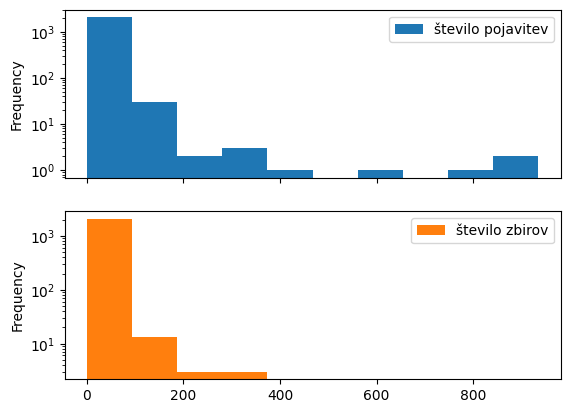

In [ ]:
vse_karte.plot.hist(subplots=True, sharex=True, logy=True)


In [ ]:
# vse_karte = vse_karte.sort_values(by="število zbirov", ascending=False)
vse_karte.sort_values(by="število pojavitev", ascending=False).head(30).style.hide(axis="index")

karta,število pojavitev,število zbirov,lokacija
Infinite Impermanence,934,341,main
"Maxx ""C""",884,297,main
Ash Blossom & Joyous Spring,817,279,main
Called by the Grave,628,315,main
Evenly Matched,437,168,main
Droll & Lock Bird,307,122,main
Triple Tactics Talent,293,184,main
S:P Little Knight,287,268,extra
Effect Veiler,258,118,main
Crossout Designator,209,209,main


### Next

In [ ]:
sum(vse_karte["število pojavitev"])

29723

In [ ]:
vse_karte.sort_values(by="število pojavitev", ascending=False).head(30).style.hide(axis="index")

karta,število pojavitev,število zbirov,lokacija
Infinite Impermanence,934,341,main
"Maxx ""C""",884,297,main
Ash Blossom & Joyous Spring,817,279,main
Called by the Grave,628,315,main
Evenly Matched,437,168,main
Droll & Lock Bird,307,122,main
Triple Tactics Talent,293,184,main
S:P Little Knight,287,268,extra
Effect Veiler,258,118,main
Crossout Designator,209,209,main
